In [1]:
import sys; sys.path.insert(0, '/home/j/jwoo/my_python/lib/python3.11/site-packages/')
import cellhint

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/uma

In [2]:
import scanpy as sc

In [3]:
adata = sc.read('/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/merged_v3.h5ad')
adata

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 74312 × 19349
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_l

In [4]:
adata.obs.Data.value_counts()

Data
Adams       15000
Reyfman     15000
Morse       15000
Haberman    14924
HO          14388
Name: count, dtype: int64

In [5]:
adata = adata.raw.to_adata()

In [6]:
del adata.var
del adata.uns

adata

AnnData object with n_obs × n_vars = 74312 × 19349
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_l

In [7]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, batch_key = 'Data', subset = True)
sc.pp.scale(adata, max_value = 10)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

... storing 'orig.ident' as categorical
... storing 'Subject_Identity' as categorical
... storing 'Library_Identity' as categorical
... storing 'barcode' as categorical
... storing 'original_barcode' as categorical
... storing 'orig.ident.y' as categorical
... storing 'CellBarcode_Identity' as categorical
... storing 'CellType_Category' as categorical
... storing 'Manuscript_Identity' as categorical
... storing 'Subclass_Cell_Identity' as categorical
... storing 'Disease_Identity' as categorical
... storing 'Donor' as categorical
... storing 'CellType_v2' as categorical
... storing 'Data' as categorical
... storing 'old_cluster' as categorical
... storing 'RNA_snn_res.0.8' as categorical
... storing 'Celltype_Original' as categorical
... storing 'RNA_snn_res.1' as categorical
... storing 'Disease' as categorical
... storing 'Disease2' as categorical
... storing 'Type' as categorical
... storing 'CellType' as categorical
... storing 'RNA_snn_res.1.2' as categorical
... storing 'Library'

In [ ]:
sc.pl.umap(adata, color = ['Data'])

In [8]:
adata

AnnData object with n_obs × n_vars = 74312 × 1413
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_la

In [11]:
alignment = cellhint.harmonize(adata, 'Data_Morse', 'CellType_Integrated_Morse_Public',use_rep='X_harmony',dataset_order = ['Morse', 'Integrated' ])

🖇 Harmonizing cell types of Morse and Integrated
🖋️ Reannotating cells
✅ Harmonization done!


In [12]:
alignment

Cross-dataset cell type alignment for 2 datasets
    base_distance: a cross-dataset distance object
    aligned_datasets: 'Morse', 'Integrated'
    relation: data frame of the harmonization table
    reannotation: data frame of the reannotated cells ('dataset', 'cell_type', 'reannotation', 'group')

In [13]:
alignment.write('/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/CellHint_alignment_Morse&Others.pkl')

In [14]:
# Note - `alignment.relation` is simply a Pandas data frame.
# Show the top 10 rows of the table.
alignment.relation.head(20)

,Morse,relation,Integrated
0,NONE,=,Mac_Lymph doublets
0,CD206hi FN1hi AM,=,FN1+ MRC1hi AM
1,CXCL10+ Macs,=,CXCL10+ ISG+ AM
2,Cycling mac,=,Proliferating AM
3,HSP macs,=,HSP+ Mac
4,cMonos,=,CMono
5,ncMonos,=,NCMono
0,DCs,∋,cDC1
1,DCs,∋,cDC2
2,IntmAM 2,∋,AM_UD


In [15]:
alignment.groups

array(['Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6',
       'Group7', 'Group8', 'Group8', 'Group9', 'Group9', 'Group10',
       'Group10', 'Group11', 'Group11', 'Group12', 'Group12', 'Group13',
       'Group13', 'Group14', 'Group14', 'Group15', 'Group16', 'Group17',
       'Group18', 'Group19'], dtype=object)

In [16]:
alignment.reannotation

,dataset,cell_type,reannotation,group
ID,,,,
AAACCTGTCAACACCA-1_1_1,Integrated,FABP4+ AM,FABP4hi AM ∈ FABP4+ AM,Group11
AAATGCCGTGGCGAAT-1_1_1,Integrated,cDC2,DCs ∋ cDC2,Group8
AACACGTTCGGTCTAA-1_1_1,Integrated,Proliferating AM,Cycling mac = Proliferating AM,Group4
AAGCCGCCAAATACAG-1_1_1,Integrated,FOL2R IM,SPP1 mid macs ∈ FOL2R IM,Group12
AAGGCAGAGCCAGGAT-1_1_1,Integrated,CMono,cMonos = CMono,Group6
...,...,...,...,...
TTGGCAACAGATCGGA-1_16_5,Morse,ncMonos,ncMonos = NCMono,Group7
TTGGCAAGTCATGCAT-1_16_5,Morse,Mac UD (transitional mono-mac),Mac UD (transitional mono-mac) ∈ Transitional_...,Group13
TTGTAGGCATGCCACG-1_16_5,Morse,SPP1 mid macs,SPP1 mid macs ∈ FOL2R IM,Group12


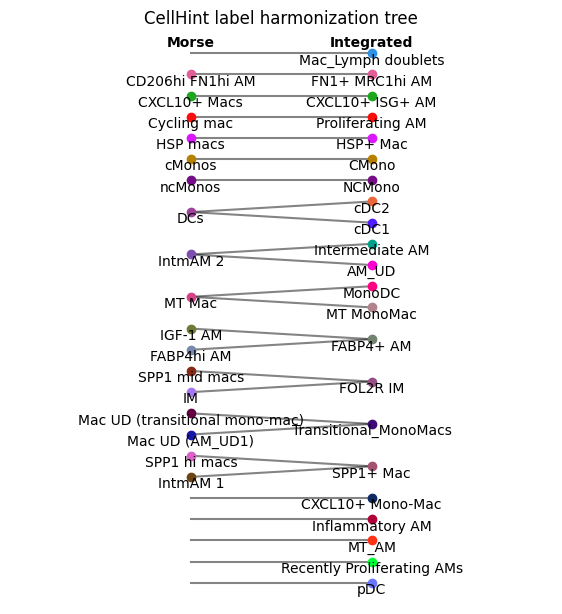

In [17]:
cellhint.treeplot(alignment)

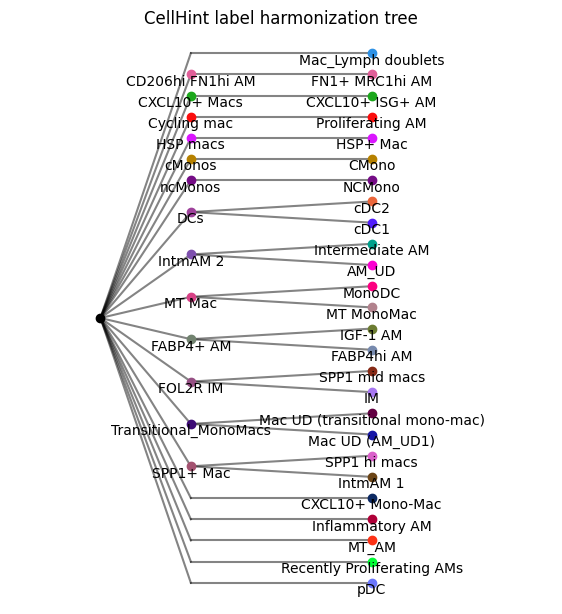

In [18]:
cellhint.treeplot(alignment,order_dataset = True)

In [19]:
member_mat = alignment.base_distance.to_meta(turn_binary = True)
member_mat.iloc[:5, :5]

,Integrated: AM_UD,Integrated: CMono,Integrated: CXCL10+ ISG+ AM,Integrated: CXCL10+ Mono-Mac,Integrated: FABP4+ AM
Integrated: AM_UD,0.982387,0.000000,0.003800,0.000921,0.016584
Integrated: CMono,0.000000,0.882937,0.000000,0.005577,0.000000
Integrated: CXCL10+ ISG+ AM,0.003800,0.000000,0.906623,0.025474,0.003342
Integrated: CXCL10+ Mono-Mac,0.000921,0.005577,0.025474,0.872928,0.000047
Integrated: FABP4+ AM,0.016584,0.000000,0.003342,0.000047,0.827852


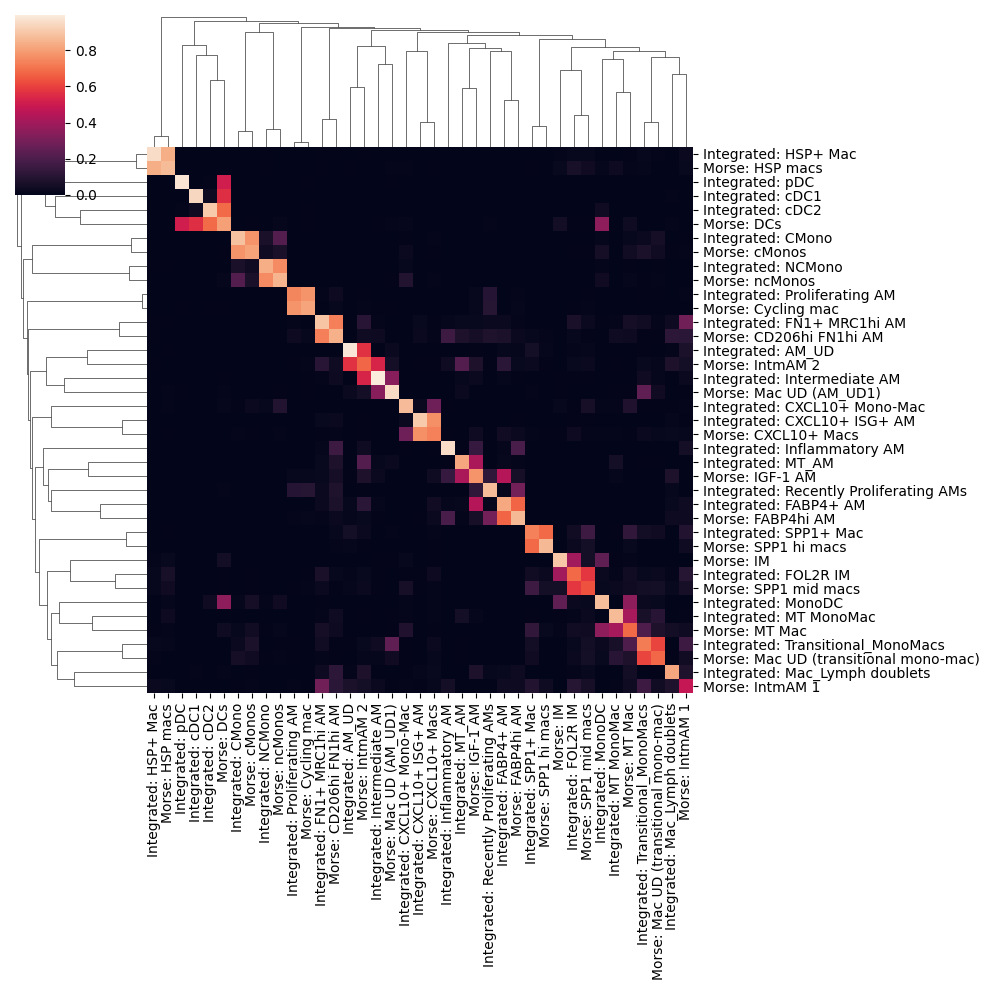

In [20]:
import seaborn as sns

sns.clustermap(member_mat)

In [21]:
alignment1 = cellhint.harmonize(adata, 'Data_AHM', 'CellType_Integrated_AHM_Public',use_rep='X_harmony',dataset_order = ['Adam & Ho','Morse', 'Integrated' ])

In [22]:
alignment1

In [ ]:
alignment1.write('/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/CellHint_alignment_AHN&Others.pkl')

In [ ]:
# Note - `alignment.relation` is simply a Pandas data frame.
# Show the top 10 rows of the table.
alignment1.relation.head(20)

In [ ]:
alignment1.groups

In [ ]:
alignment1.reannotation

In [23]:
cellhint.treeplot(alignment1)

In [ ]:
cellhint.treeplot(alignment1,order_dataset = True)

In [ ]:
member_mat1 = alignment1.base_distance.to_meta(turn_binary = True)
member_mat1.iloc[:5, :5]

In [ ]:
import seaborn as sns

sns.clustermap(member_mat1)